# Natural Language Processing

- Computer needs specialized processing techinique inorder to understand raw text data
- Text data is highly unstructured
- NLP use techniques to create structure out of text data
- works : classify spam, hey google, analyzing trends from written customer feedback forms, sentiment analysis


### Spacy
- nlp library
- handle nlp task with has common algorithms
- for nlp task, spacy has one implemented method
- you don't have option to choose other algo

### NLTK
- older than spacy
- less efficient implementation
- 

### Comparison
- spacy faster but less flexibility
- 

## Spacy Library

### shorts:
- imort spacy
- load model nlp (spacy.load())
- create document object by applying it to text, [spacy also builds a vocab object for vacubalar, for future]
- nlp.pipeline
- tagging, parsing and entity recognizer is present in pipeline
- use nlp.pipe_names etc to play around

In [1]:
import spacy

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
doc = nlp(u'Tesla is looking to buying U.S. startup for $6 million')

In [4]:
for token in doc:
    print(f"{token.text:{10}} {token.pos_:{30}} {token.dep_:{20}}")

Tesla      PROPN                          nsubj               
is         AUX                            aux                 
looking    VERB                           ROOT                
to         PART                           aux                 
buying     VERB                           xcomp               
U.S.       PROPN                          compound            
startup    NOUN                           dobj                
for        ADP                            prep                
$          SYM                            quantmod            
6          NUM                            compound            
million    NUM                            pobj                


In [5]:
# above syntatic dependency => token.dep_

In [6]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x1ea6ae65880>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x1ea6b012100>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x1ea6b013120>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x1ea6b091dc0>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x1ea6b098bc0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x1ea6b013270>)]

In [7]:
 nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [8]:
# in our version we have 6 operations in pipeline

In [9]:
doc2 = nlp(u'Tesla isn\'t looking for    startups anymore.')

In [10]:
for token in doc2:
    print(f"{token.text:{20}} {token.pos_:{30}} {token.dep_:{20}}")

Tesla                PROPN                          nsubj               
is                   AUX                            aux                 
n't                  PART                           neg                 
looking              VERB                           ROOT                
for                  ADP                            prep                
                     SPACE                          dep                 
startups             NOUN                           pobj                
anymore              ADV                            advmod              
.                    PUNCT                          punct               


In [11]:
# we can use indexing to get our perferred token
doc2[0].pos_

'PROPN'

In [12]:
doc2[0]

Tesla

In [13]:
doc2[0].dep_

'nsubj'

### Tag and its description
- .text   the org word text--------------------------------------- Tesla
- .lemma  the base form of word----------------------------------- tesla
- .pos_   the simple part of speech------------------------------- PROPN/proper noun
- .tag_   the detailed part of speech tag------------------------- NNP/noun, proper singular
- .shape_ the word shape -capitialization, punc, digits----------- Xxxxx
- .is_alpha Is the token an alpha character ?--------------------- True
- .is_stop  is the token a part of a stop list,most common words-- False

In [14]:
# taking only a part of large text:
speech = nlp(u'Although its tough to live in the desert , mountains could be way worse, everything depends on the climatic condition')

In [15]:
sliced_speech = speech[10:15]

In [16]:
print(sliced_speech)

could be way worse,


In [17]:
# spacy is smart enough to know its a span of a larger doc
type(sliced_speech)

spacy.tokens.span.Span

In [18]:
type(speech)

spacy.tokens.doc.Doc

In [19]:
# spacy is smart enough to understand sentence
doc4 = nlp(u'This is first sentence. This is another sentence. This is  last sentence')


In [20]:
for sentence in doc4.sents:
    print(sentence)

This is first sentence.
This is another sentence.
This is  last sentence


In [21]:
doc4[4].is_sent_start

False

In [22]:
doc4[5].is_sent_start  # refers to This

True

In [23]:
print(doc4[0],'-', doc4[1],'-', doc4[2], '-', doc4[3], '-',doc4[4], '-',doc4[5],'-', doc4[6])

This - is - first - sentence - . - This - is


In [24]:
# note: the . is considered as a indexed text, see above

## Tokenization

#### breaking the org text into pieces
- understand suffix and prefix
- split on white space
- exceptions, those are concatination , i think like "won't"
- exclamation

In [25]:
from IPython import display

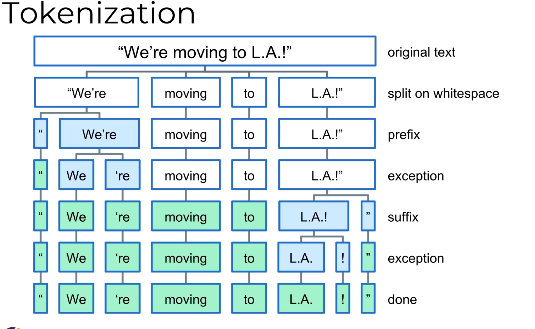

In [26]:
display.Image('resources/tokenization.png')

we have not seen any conversion to word stems or lemmas(base forms of words) and we haven't seen anything aobut organizations /places/ money

everything that helps us to understand the meaning of text is derived from token

- prefix : char at beg  [$,  (,  "] 
- suffix : char at end  [km, ), ., ,, ! ]
- infix : char inbetween [- --/ ...]
- Exception : special-case rule to split a string into several tokens or prevent string from being split when punctuation rules are applied [let's U.S.]

In [27]:
import spacy

In [28]:
nlp = spacy.load('en_core_web_sm')

In [29]:
mystring = '"we\'re moving to L.A.!"'

In [30]:
print(mystring)

"we're moving to L.A.!"


In [31]:
doc = nlp(mystring)

In [32]:
for token in doc:
    print(token.text)

"
we
're
moving
to
L.A.
!
"


In [33]:
# observe above, the L.A. is not seperated just beacause . came, the spacy is smart
# to understand it

# spacy is going to isolate puncuation that is not forming an essential part of the word
# things like quatation mark exclamation mark at end 

# however the puncuation that exist as a part of an email, or numerical example will be kept
# eg:

doc2= nlp(u"We're here to help ! Send snail-mail, email support@oursite.com or visit at @ http://www.oursite.com!")


In [34]:
for t in doc2:
    print(t)

We
're
here
to
help
!
Send
snail
-
mail
,
email
support@oursite.com
or
visit
at
@
http://www.oursite.com
!


In [35]:
doc3 = nlp(u'A 5km nyc cab ride costs $10.30')
for token in doc3:
    print(token)

A
5
km
nyc
cab
ride
costs
$
10.30


In [36]:
# observe how 5km is seperated as 5 and km, while 10.30 remains intact

In [37]:
doc4 = nlp(u"Let's visit St. Louis in the U.S. next year.")

In [38]:
for token in doc4:
    print(token)

Let
's
visit
St.
Louis
in
the
U.S.
next
year
.


In [39]:
# to check the length of tokens
len(doc4)

11

#### Vocab
- we can also find the length of the vocab
- len(doc4.vocab)

In [40]:
len(doc4.vocab)

794

In [41]:
doc5 = nlp(u"It is better to give than recieve")
doc5[0]

It

In [42]:
doc5[2:5]

better to give

In [43]:
# tokens don't support reassignment
# docs[0] = 'test' -----> gives error

### named entities
- named entities are accessible with ENTS property

In [44]:
doc8 = nlp(u'Apple to build a Hong kong factory for $6 million')

In [45]:
for token in doc8:
    print(token.text, end = ' | ')

Apple | to | build | a | Hong | kong | factory | for | $ | 6 | million | 

In [46]:
for  entity in doc8.ents:
    print(entity)

Apple
Hong kong
$6 million


In [47]:
# we can see what these name refers to:
for entity in doc8.ents:
    print(entity)
    print(entity.label_)
    print(str(spacy.explain(entity.label_)))
    print('\n')

Apple
ORG
Companies, agencies, institutions, etc.


Hong kong
GPE
Countries, cities, states


$6 million
MONEY
Monetary values, including unit




### noun chunks
- just like ENTS we have something for nouns
- are base noun phrases
- essentially flat phrases having a noun as head
- noun + word describing the nouns

In [48]:
doc9 = nlp(u'Autnomous cars shift insurance liability toward manufacturers')

In [49]:
for chunk in doc9.noun_chunks:
    print(chunk)

Autnomous cars
insurance liability
manufacturers


### Displacy
- displacy is build in visualizer
- you can run inside jup notebok, or outside using a little server by pthon script

In [50]:
from spacy import displacy

### det in style : syntatic dependency
it tells how its related

In [51]:
doc = nlp(u"Apple is going to build a U.K. factory for $6 million")

In [52]:
displacy.render(doc, style= 'dep', jupyter= True, options= {'distance': 70})

### ent in style : entity depedency
what it does, : it identifies each entity and highlights along with what kind of entity it is 


In [53]:
doc2 = nlp(u'Over the last quarter Apple sold nearly 20 thousand iPods for profit of $6 million.')

In [54]:
# style 'det' was for syntatic depedency, here we are saying 'ent' for entity
displacy.render(doc2, style= 'ent', jupyter= True)

### Options dictionray:
- it has styling options, check spacy docs if required..

## Stemming

- stemming is chopping from end to reach the stem of word --> boating reduced to boat
- spacy has lemmatization instead

In [55]:
# we'r going to learn about stemming because it comes as part of nlp discussion
# for this use NLTK
# -porter stemmer
# -snowball stemmer

based on the longest suffix its done, so word like  caresses changes to caress not cares 

snowball is just a better version

In [56]:
import nltk

In [57]:
from nltk.stem.porter import PorterStemmer

In [58]:
p_stemmer = PorterStemmer()

In [59]:
words = ['run', 'runner', 'ran', 'runs', 'easily', 'fairly']

In [60]:
for word in words:
    print(word , '-------------> ',p_stemmer.stem(word))

run ------------->  run
runner ------------->  runner
ran ------------->  ran
runs ------------->  run
easily ------------->  easili
fairly ------------->  fairli


In [61]:
from nltk.stem.snowball import SnowballStemmer

In [62]:
s_stemmer = SnowballStemmer(language = 'english')

In [63]:
for word in words:
    print(word + '-------------> ' + s_stemmer.stem(word))

run-------------> run
runner-------------> runner
ran-------------> ran
runs-------------> run
easily-------------> easili
fairly-------------> fair


In [64]:
words = ['generous', 'generation', 'generously', 'generate']
for word in words:
    print(word + '----------->  ' + s_stemmer.stem(word))

generous----------->  generous
generation----------->  generat
generously----------->  generous
generate----------->  generat


## Lemmatization
- its beyond word reduction by just cutting of 
- more informative
- see sorrounding words to determine

In [65]:
import spacy

In [66]:
nlp = spacy.load('en_core_web_sm')

In [67]:
doc1 = nlp(u"I am a runner running in a race because I love to run since i ran today")


In [68]:
# lemma : you can access the lemma-hashcode using token.lemma
# Original lemma can be accessed by using token.lemma_

for token in doc1:
    print(token.text, '\t\t', token.pos_ +'\t', token.lemma, '\t\t', token.lemma_)

I 		 PRON	 4690420944186131903 		 I
am 		 AUX	 10382539506755952630 		 be
a 		 DET	 11901859001352538922 		 a
runner 		 NOUN	 12640964157389618806 		 runner
running 		 VERB	 12767647472892411841 		 run
in 		 ADP	 3002984154512732771 		 in
a 		 DET	 11901859001352538922 		 a
race 		 NOUN	 8048469955494714898 		 race
because 		 SCONJ	 16950148841647037698 		 because
I 		 PRON	 4690420944186131903 		 I
love 		 VERB	 3702023516439754181 		 love
to 		 PART	 3791531372978436496 		 to
run 		 VERB	 12767647472892411841 		 run
since 		 SCONJ	 10066841407251338481 		 since
i 		 PRON	 4690420944186131903 		 I
ran 		 VERB	 12767647472892411841 		 run
today 		 NOUN	 11042482332948150395 		 today


In [69]:
def show_lemma(text):
    for token in text:
        print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_:{20}}')

In [70]:
doc2 = nlp(u"I saw ten mice today!")

In [71]:
show_lemma(doc2)

I            PRON   4690420944186131903    I                   
saw          VERB   11925638236994514241   see                 
ten          NUM    7970704286052693043    ten                 
mice         NOUN   1384165645700560590    mouse               
today        NOUN   11042482332948150395   today               
!            PUNCT  17494803046312582752   !                   


## StopWords

- words like a , the, appear so frequently that they don't require tagging
- we remove them

In [72]:
import spacy

In [73]:
nlp = spacy.load('en_core_web_sm')

In [74]:
print(nlp.Defaults.stop_words)

{'behind', 'otherwise', "'ll", 'which', 'until', 'rather', "n't", 'of', 'could', 'first', 'when', 'neither', 'quite', 'hereafter', 'our', 'not', 'due', 'one', 'bottom', 'mostly', 'make', 'any', 'have', 'thence', 'three', '’ll', 'above', 'became', 'up', 'back', 'together', 'whether', 'from', 'himself', 'had', 'beforehand', 'or', 'after', 'afterwards', 'did', 'meanwhile', 'becoming', 'full', 'nothing', 'a', 'it', 'whereafter', 'whither', 'will', 'everything', 'yours', 'sixty', 'around', 'within', 'show', 'they', 'much', 'anything', 'him', 'everyone', '‘s', 'however', 'former', 'now', 'only', 'someone', 'below', 'give', 'somewhere', 'but', 'nevertheless', 'been', 'throughout', 'are', 'seeming', 'yourself', 'where', 'to', 'too', 'has', 'wherever', 'beyond', 'who', 'see', '‘m', 'themselves', 'whom', 'go', 'wherein', 'during', 'toward', 'put', 'whereas', 'nor', 'all', 'perhaps', 'four', 'thru', 'his', 'twenty', 'used', 'hundred', 'per', 'and', 'anywhere', 'keep', 'others', 'the', 'would', 's

In [75]:
len(nlp.Defaults.stop_words)

326

In [76]:
# to check weather a word is stopWord just call vocab in it
# append is_stop attribute


nlp.vocab['is'].is_stop

True

In [77]:
nlp.vocab['mystery'].is_stop

False

In [78]:
# may be you want to add a new stop word to the vacabalory, in that case you 
# can do nlp.Defaults.stop_words.add('btw')

# eg: when you are reading a file with 'by the way' written as 'btw', you can 
# just add that to your set

In [79]:
nlp.Defaults.stop_words.add('btw')

In [80]:
nlp.vocab['btw'].is_stop 

True

In [86]:
st_item = nlp(u'btw')
type(st_item[0].pos_)

str

In [91]:
len(nlp.Defaults.stop_words)   # earlier it was 326

327

In [92]:
nlp.vocab['btw'].is_stop

True

In [93]:
# if you wanna remove a stopWord

In [94]:
nlp.Defaults.stop_words.remove('btw')

In [95]:
nlp.vocab['btw'].is_stop = False

In [96]:
nlp.vocab['btw'].is_stop

False

## Vocabulary and Matching

- identify and label specific phrases that match patterns we can define ourself
- powerful version of regular expression
- 

In [98]:
# refer : Vacabulary- and - Matching. ipynb ----> from course material, see the tables

In [101]:
from IPython import display

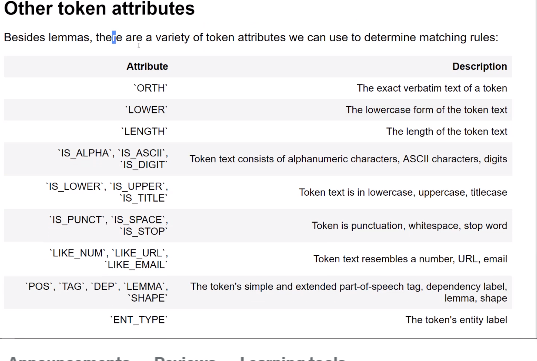

In [104]:
display.Image('resources/vacabulary1.png')

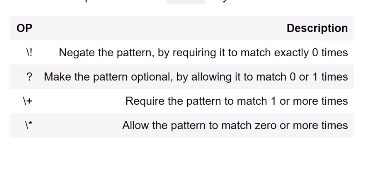

In [105]:
display.Image('resources/vacabulary2.png')

In [198]:
import spacy

In [199]:
nlp = spacy.load('en_core_web_sm')

In [200]:
# rule based matching
# matcher : lib of matching pattern and match those pattern aganist a doc obj, to return a list of found matches 

In [201]:
from spacy.matcher import Matcher

In [202]:
matcher = Matcher(nlp.vocab)

In [203]:
# create patterns to match on ...
# check out the tables on the provided material of vocabalory and matching

# we wanna detect it if
# 1) Solarpower
# 2) Solar-power
# 3) Solar power


# checking if we transform the characters to lowercase will it mathc solarpower
pattern1 = [{'LOWER': 'solarpower'}]

# its going to find out different types of punctuation bw the solar and power
pattern2 = [{'LOWER': 'solar'}, {'IS_PUNCT': True}, {'LOWER': 'power'}]

# detect Solar power
pattern3 = [{'LOWER': 'solar'}, {'LOWER':'power'}]

In [204]:
# callback is set none
# name is given as SolarPowerMatcher
# note: there is change in what shown in video and I did

matcher.add('SolarPowerMatcher',[pattern1, pattern2, pattern3])

In [205]:
doc = nlp(u"the Solar Power industry grows as solar power increases, Solar-power is best")

In [206]:
found_matches = matcher(doc)

In [207]:
print(found_matches)

[(6604624467252227415, 1, 3), (6604624467252227415, 6, 8), (6604624467252227415, 10, 13)]


### to understand 

In [208]:
for match_id, start, end in found_matches:
    string_id = nlp.vocab.strings[match_id]
    span = doc[start:end]
    print(match_id, string_id, start, end, span.text)

6604624467252227415 SolarPowerMatcher 1 3 Solar Power
6604624467252227415 SolarPowerMatcher 6 8 solar power
6604624467252227415 SolarPowerMatcher 10 13 Solar-power


### remove from the matcher
- matcher.remove('SolarPowerMatcher')

In [190]:
matcher.remove('SolarPowerMatcher')

### The 0 or more operator

In [191]:

pattern1 = [{'LOWER': 'solarpower'}]
# the op '*' allows the pattern to match zero or more times
pattern2 = [{'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER':'power'} ]

In [192]:
matcher.add('SolarPowerMatcher', [pattern1, pattern2])

In [193]:
# eg of  pattern1 and pattern2
# solarpower SolarPower
# solar.power

In [194]:
doc = nlp(u'Solar--power is solar power yay!')

In [195]:
matches_found= matcher(doc)

In [196]:
print(matches_found)

[(6604624467252227415, 0, 3), (6604624467252227415, 4, 6)]


In [197]:
for match_id, beg, end in matches_found:
    string_id = nlp.vocab.strings[match_id]
    span_val =  doc[beg:end]
    print(string_id, span_val)

SolarPowerMatcher Solar--power
SolarPowerMatcher solar power


In [136]:
# see the notbook provided and docs link at the end

## Vocabulary and Matching part 2

- here we do, phrase matching

In [158]:
from spacy.matcher import PhraseMatcher


In [159]:
with open('resources/reaganomics.txt', 'r') as f:
    doc3 = nlp(f.read())
    

In [160]:
matcher = PhraseMatcher(nlp.vocab)

In [171]:
phrase_list = ['voodoo economics', 'supply-side economics', 'trickle-down economics', 'free-market economics']

In [172]:
phrase_patterns = [nlp(text) for text in phrase_list]
phrase_patterns

[voodoo economics,
 supply-side economics,
 trickle-down economics,
 free-market economics]

In [173]:
matcher.add('EconMatcher', phrase_patterns)

In [174]:
found_matches = matcher(doc3)

In [175]:
found_matches

[(3680293220734633682, 41, 45),
 (3680293220734633682, 49, 53),
 (3680293220734633682, 54, 56),
 (3680293220734633682, 61, 65),
 (3680293220734633682, 673, 677),
 (3680293220734633682, 2987, 2991)]

In [176]:
for match_id, beg, end in found_matches:
    string_id = nlp.vocab.strings[match_id]
    span_val = doc3[beg:end]
    print(string_id, span_val)

EconMatcher supply-side economics
EconMatcher trickle-down economics
EconMatcher voodoo economics
EconMatcher free-market economics
EconMatcher supply-side economics
EconMatcher trickle-down economics


# Assesment

In [209]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [210]:
# create document object from a text file

In [211]:
myfile = open('resources/owlcreek.txt')

In [215]:
myfile.seek(0)

0

In [216]:
doc = nlp(myfile.read())

In [218]:
doc[:36]

AN OCCURRENCE AT OWL CREEK BRIDGE

by Ambrose Bierce

I

A man stood upon a railroad bridge in northern Alabama, looking down
into the swift water twenty feet below.  

In [219]:
# how many tokens in the file:
len(doc)

4835

In [246]:
# make a list of sentences
sent_list = [sentence for sentence in doc.sents]

In [247]:
# how many sentences:
count = 0
for sentence in doc.sents:
    count+=1
print(count)

201


In [248]:
# print second sentence in document
count = 0
for sentence in doc.sents:
    if count ==1:
        print(sentence)
        break
    count+=1


The man's hands were behind
his back, the wrists bound with a cord.  


In [249]:
print(sent_list[1])

The man's hands were behind
his back, the wrists bound with a cord.  


In [250]:
# for each token print text, tag_, dep_ ,and lemma, lemma_

In [267]:
for tokens in doc:
    print(f"{tokens.text:20} {tokens.tag_:10} {tokens.lemma_:15}")
#     print(tokens.text, '\t\t', tokens.tag_, '\t', tokens.lemma_, '\t', tokens.dep_)

AN                   DT         an             
OCCURRENCE           NNP        OCCURRENCE     
AT                   NNP        AT             
OWL                  NNP        OWL            
CREEK                NNP        CREEK          
BRIDGE               NN         bridge         


                   _SP        

             
by                   IN         by             
Ambrose              NNP        Ambrose        
Bierce               NNP        Bierce         


                   _SP        

             
I                    PRP        I              


                   _SP        

             
A                    DT         a              
man                  NN         man            
stood                VBD        stand          
upon                 IN         upon           
a                    DT         a              
railroad             NN         railroad       
bridge               NN         bridge         
in                   IN         in      

a                    DT         a              

                    _SP        
              
vast                 JJ         vast           
pendulum             NN         pendulum       
.                    .          .              
                     _SP                       
Then                 RB         then           
all                  DT         all            
at                   IN         at             
once                 RB         once           
,                    ,          ,              
with                 IN         with           
terrible             JJ         terrible       
suddenness           NN         suddenness     
,                    ,          ,              
the                  DT         the            
light                NN         light          

                    _SP        
              
about                IN         about          
him                  PRP        he             
shot                 VBD        shoot   

                     _SP                       
As                   IN         as             
he                   PRP        he             
shook                VBD        shake          
his                  PRP$       his            
head                 NN         head           
free                 JJ         free           
from                 IN         from           
the                  DT         the            
commotion            NN         commotion      
of                   IN         of             
the                  DT         the            
smitten              JJ         smitten        

                    _SP        
              
water                NN         water          
he                   PRP        he             
heard                VBD        hear           
the                  DT         the            
deflected            VBN        deflect        
shot                 NN         shot           
humming              VBG        hum     

In [268]:
# write a matcher called swimming, find occourance of swimming vigrously

In [270]:
from spacy.matcher import Matcher

In [271]:
matcher = Matcher(nlp.vocab)

In [272]:
pattern1 = [{'LOWER': 'swimming'}, {'IS_SPACE': True}, {'LOWER': 'vigorously'}]
matcher.add('SwimmingVigrously', [pattern1])

In [276]:
my_matches = matcher(doc)
my_matches

[(18311540607251823792, 1274, 1277), (18311540607251823792, 3609, 3612)]

In [281]:
for match_id, beg, end in my_matches:
    print(doc[beg-10:end+10])
    print('\n')

 By diving I could evade the bullets and, swimming
vigorously, reach the bank, take to the woods and


saw all this over his shoulder; he was now swimming
vigorously with the current.  His brain was as energetic




In [282]:


#

In [283]:
#  to print entire sentence

In [286]:
for sentence in doc.sents:
    if my_matches[0][1] < sentence.end:
        print(sentence)
        break

By diving I could evade the bullets and, swimming
vigorously, reach the bank, take to the woods and get away home.  
